In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.core.display import display, HTML

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def bar_plots(axes):
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_yticklabels(())
    axes.set_ylabel("")
    axes.set_xlabel("")

# Exploring dataset

In [3]:
df = pd.read_csv("/kaggle/input/heart-diseae/heart-disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
cats = [i for i in df.columns if  df[i].nunique() <= 5]
nums = [i for i in df.columns if i not in cats]

# Count of categorical features

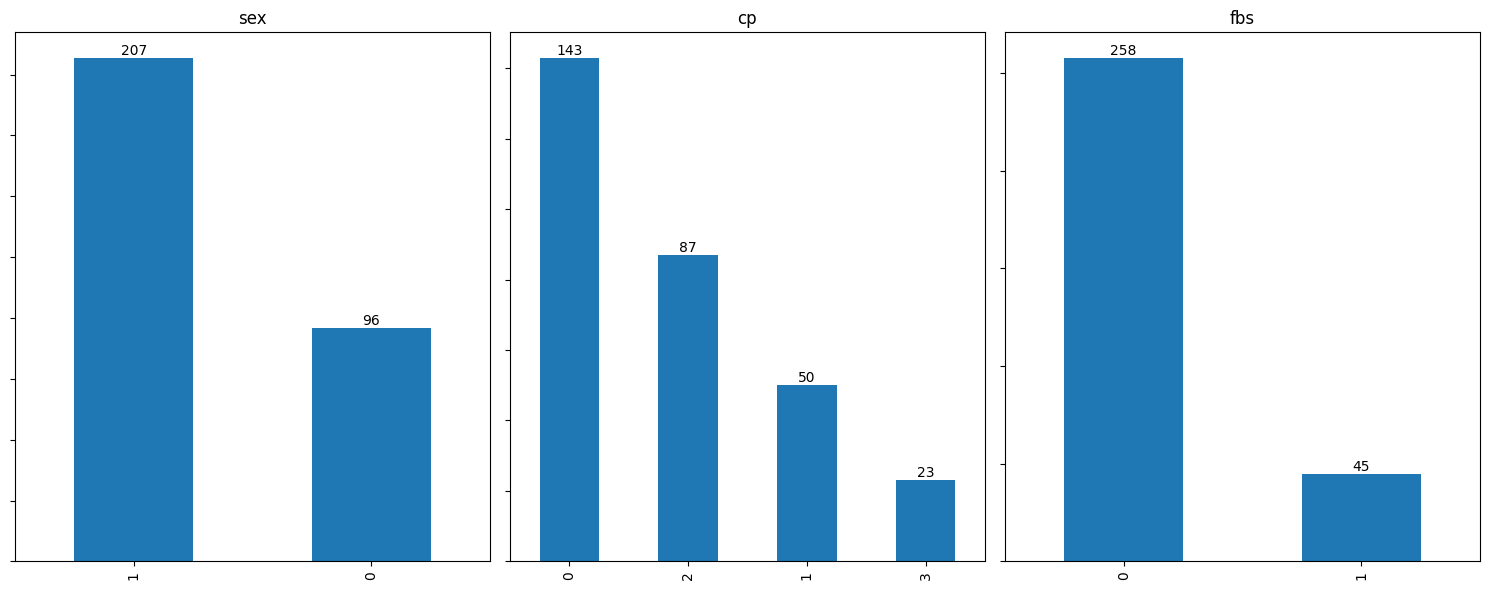

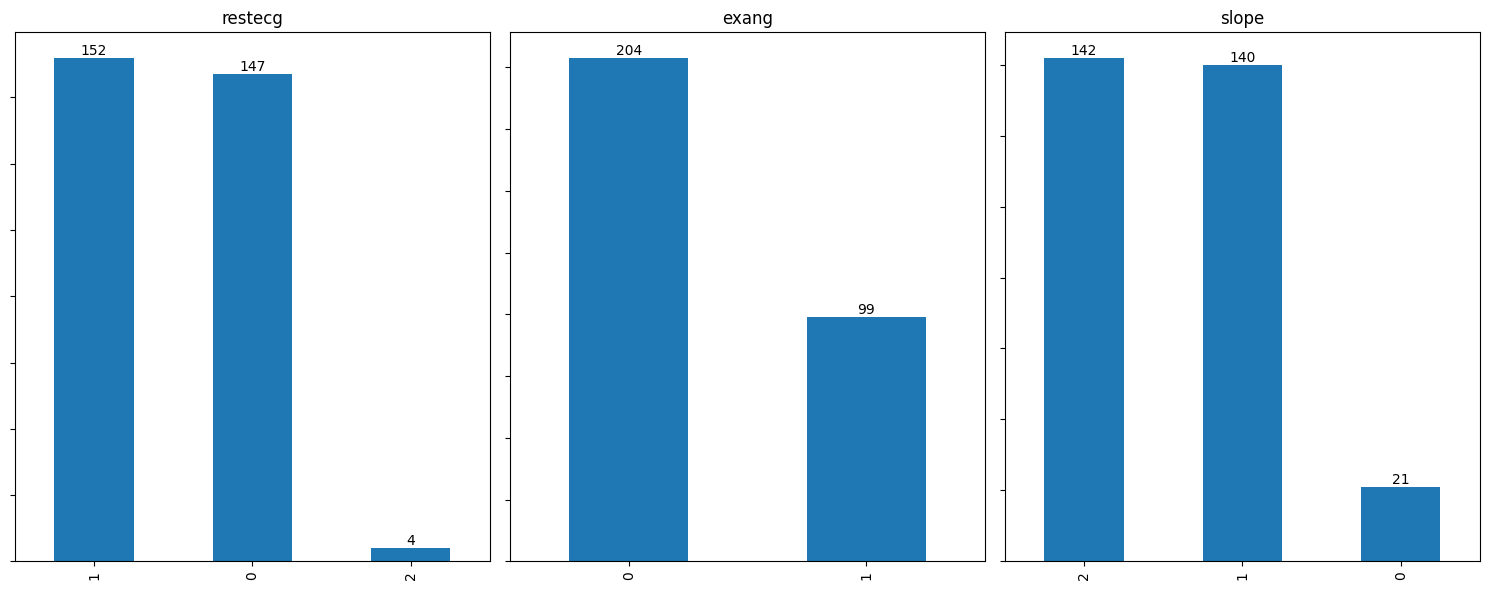

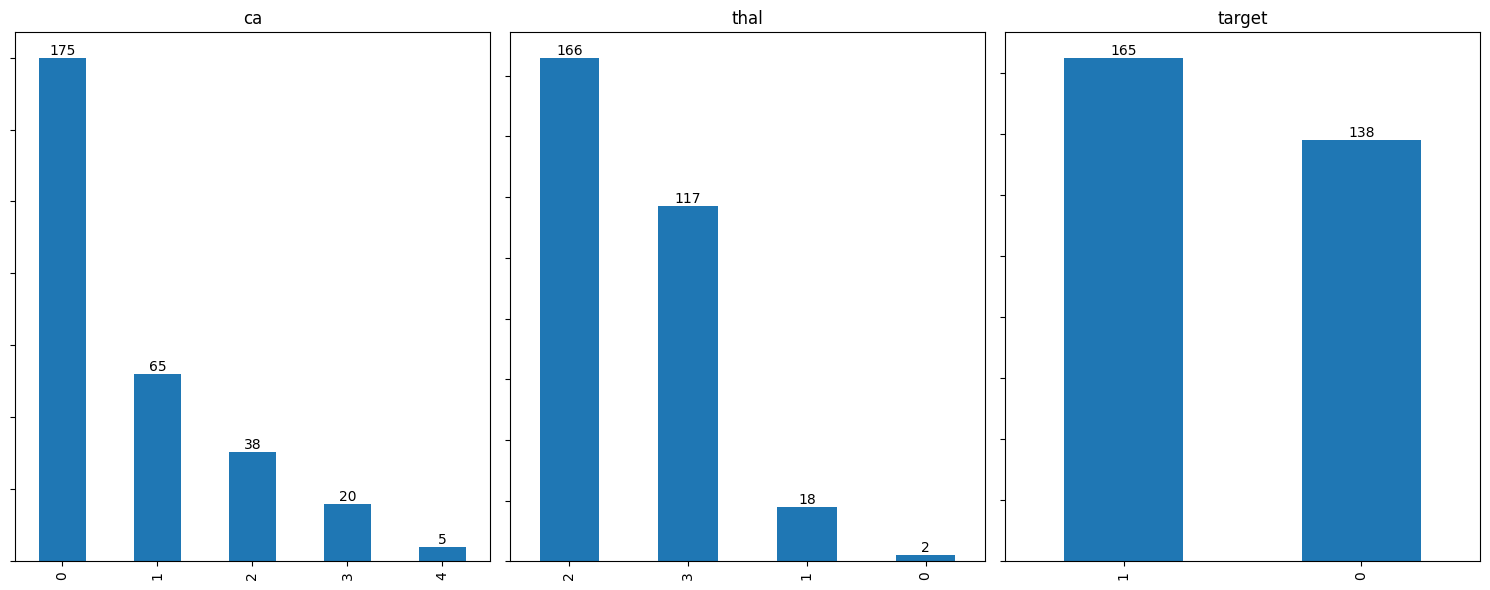

In [9]:
index = 0

for _ in range(3):
    fig, axes=  plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[i])
        bar_plots(axes[i])
        axes[i].set_title(cats[index])
        index += 1
    plt.tight_layout()
    plt.show()

# Distribution of numerical features of patients health status

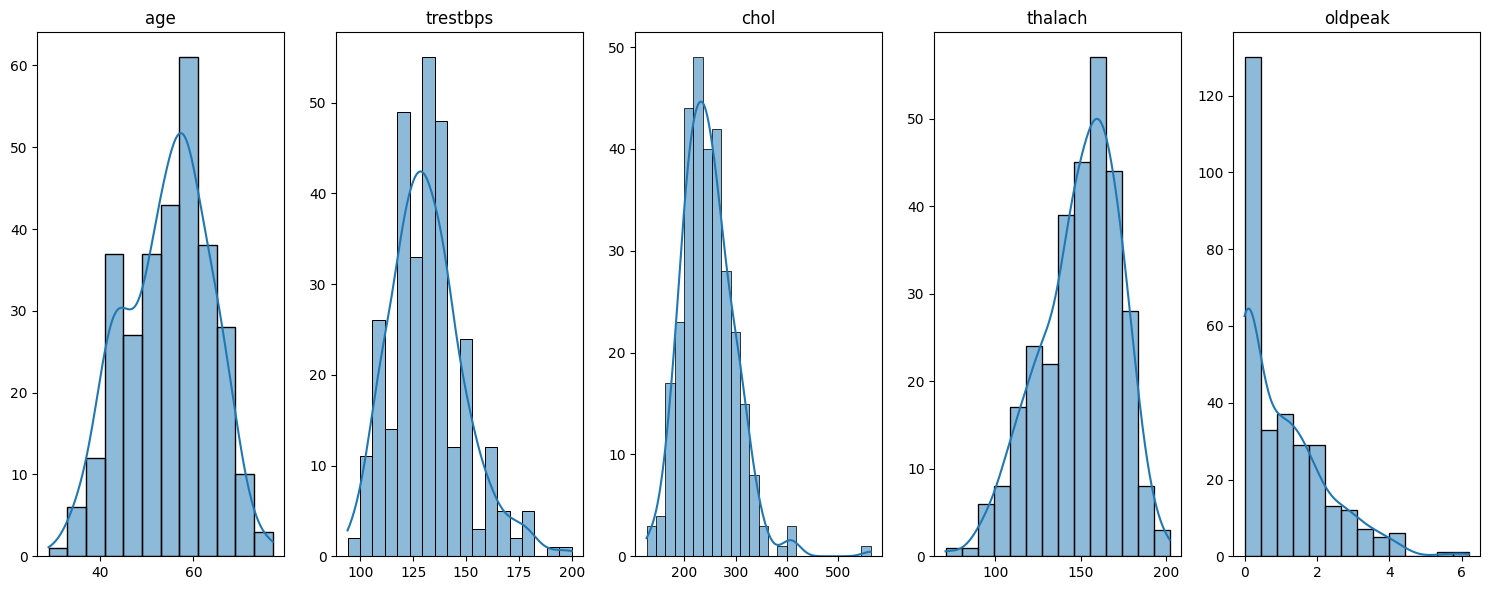

In [10]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Numerical data distribution among patients with heart disease and without the heart disease with mean values per class

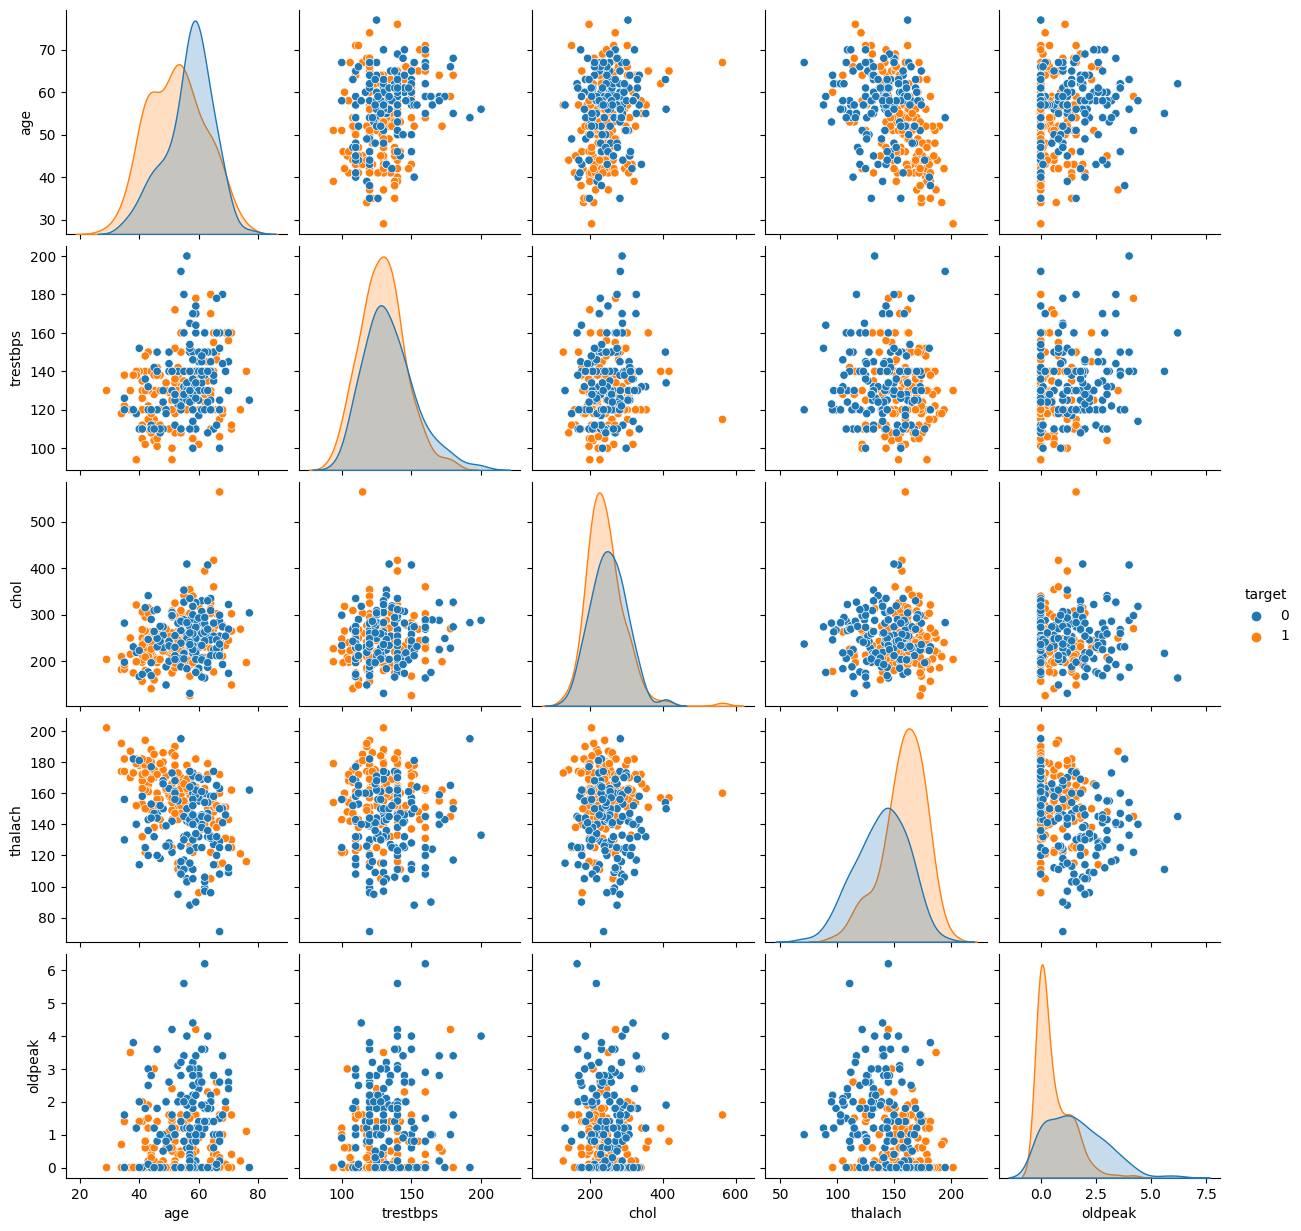

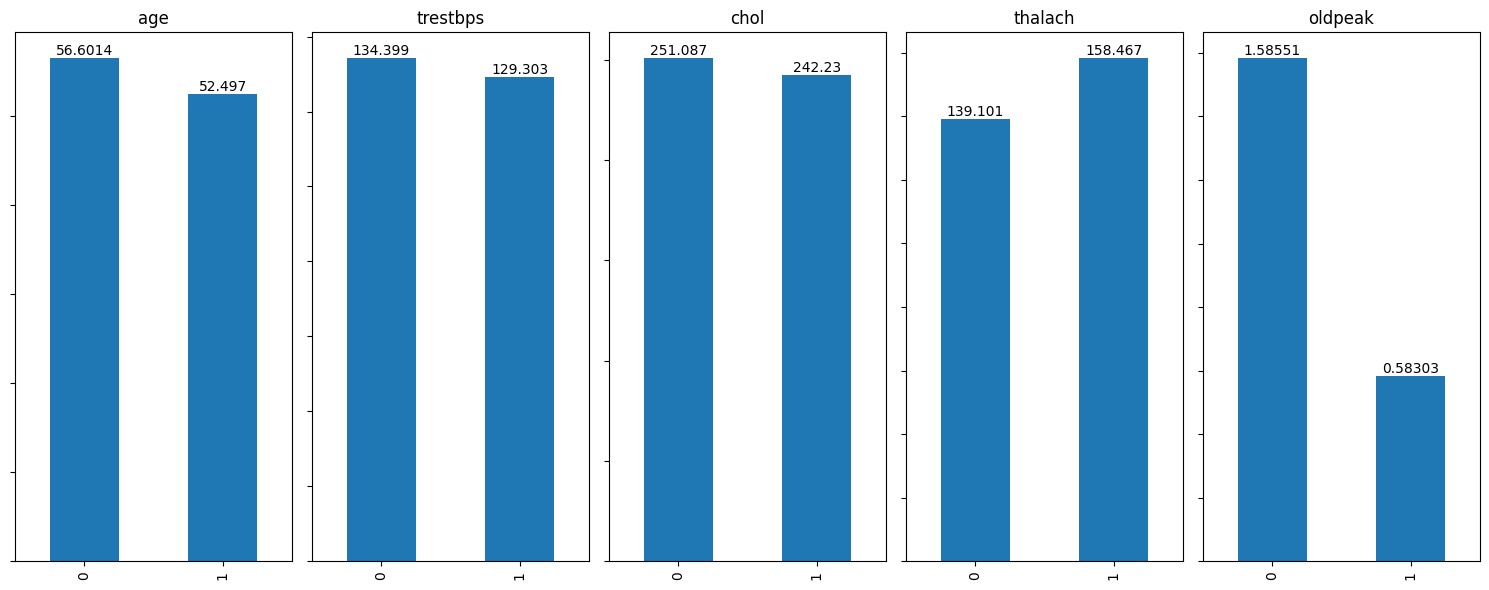

In [11]:
sns.pairplot(df, vars=nums, hue=cats[-1])
plt.show()

grouped = df.groupby(cats[-1])

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
for i, j in enumerate(nums):
    mean = grouped[j].mean()
    mean.plot(kind="bar", ax=axes[i])
    bar_plots(axes[i])
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Mean values and data density distribution for numerical features among categorical ones

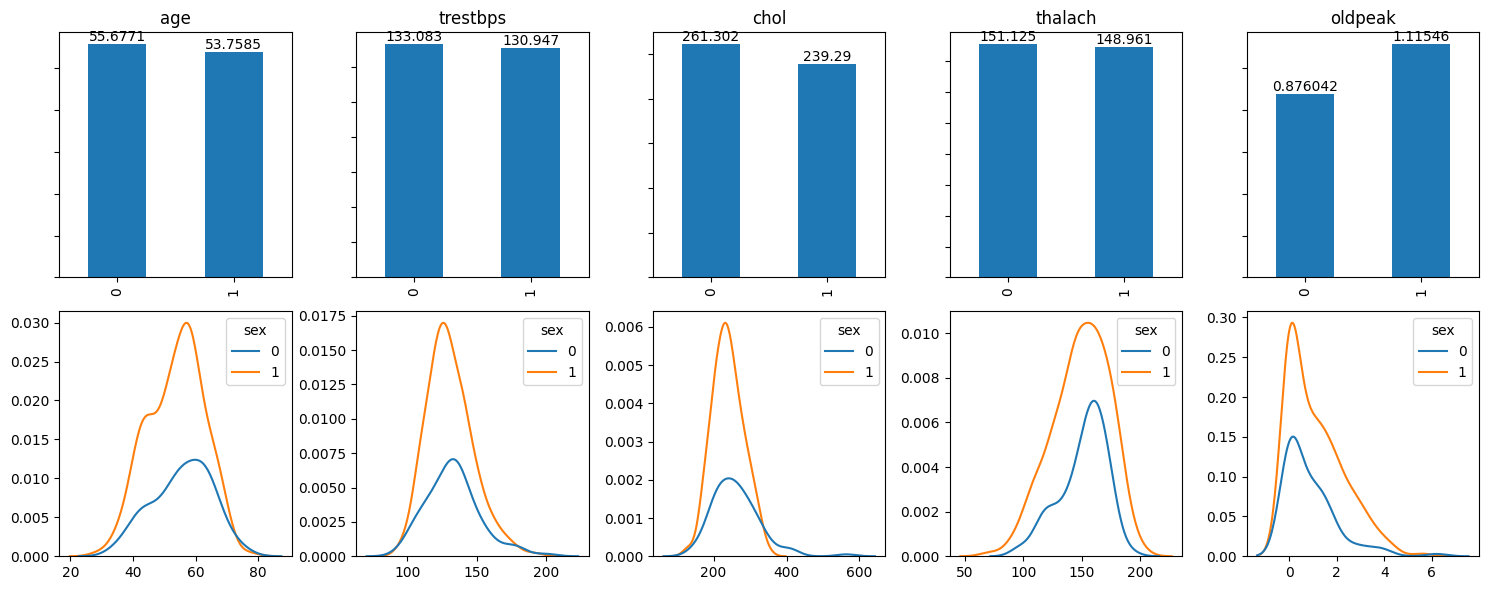

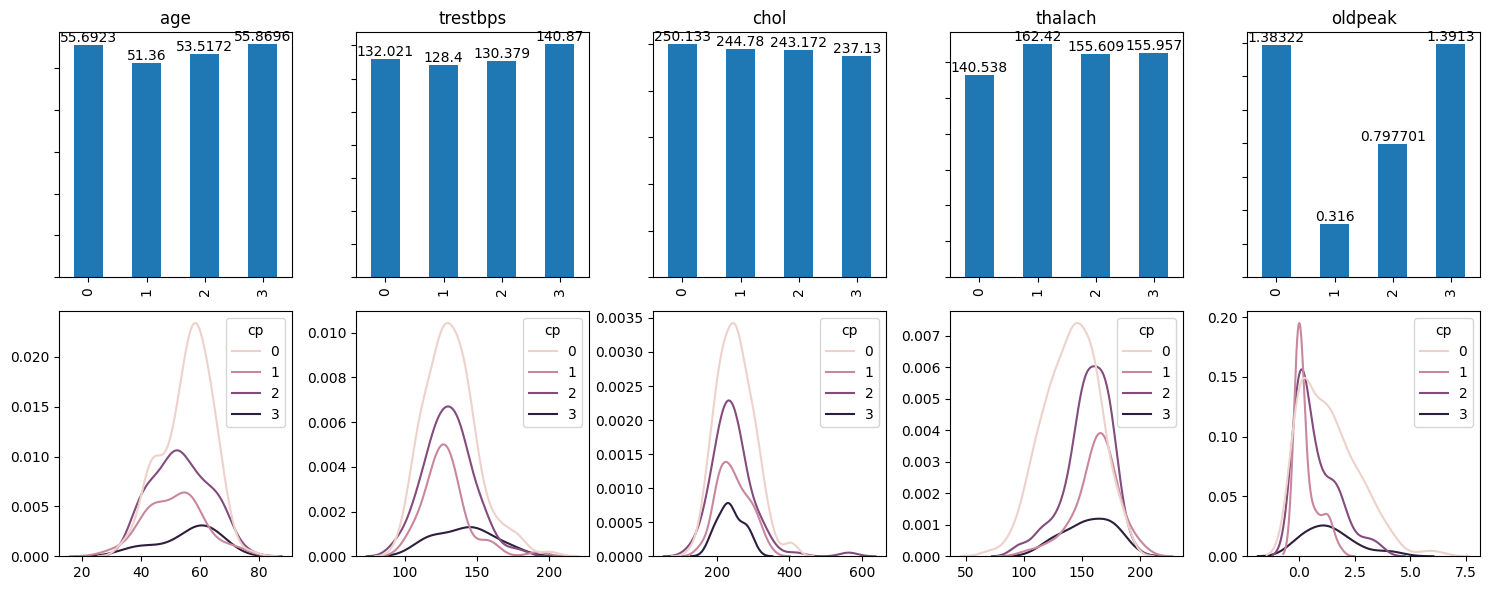

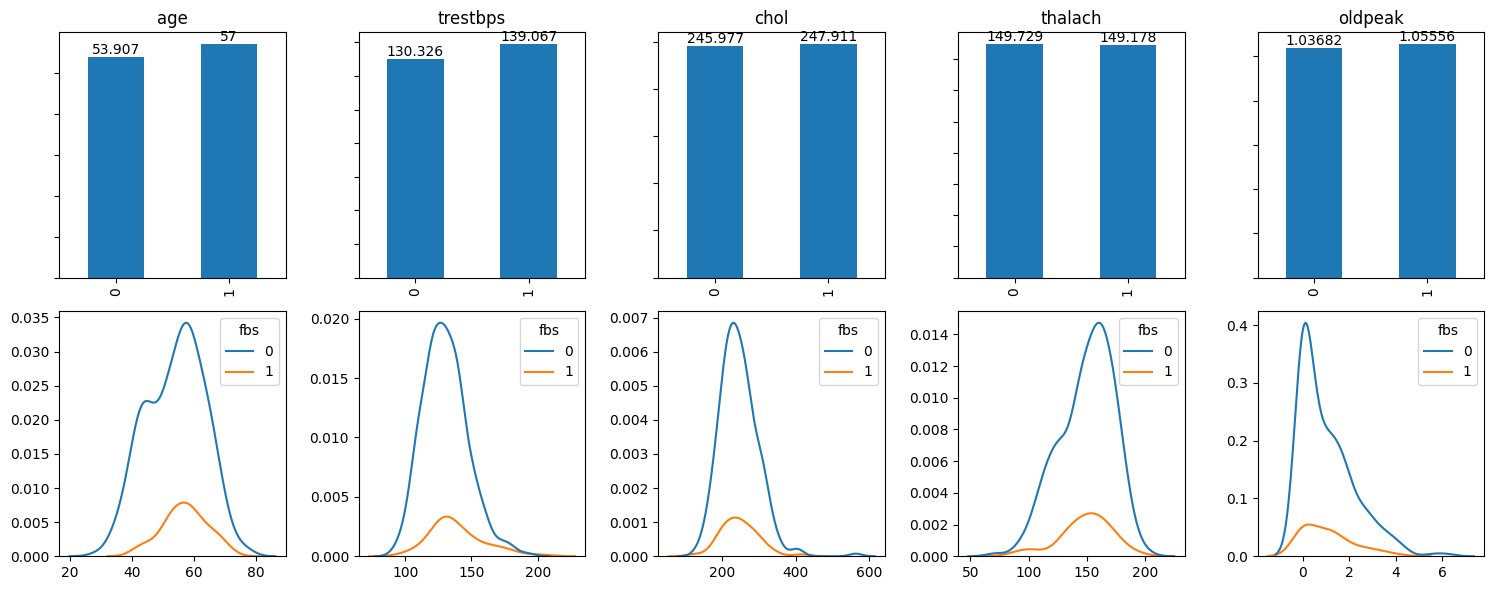

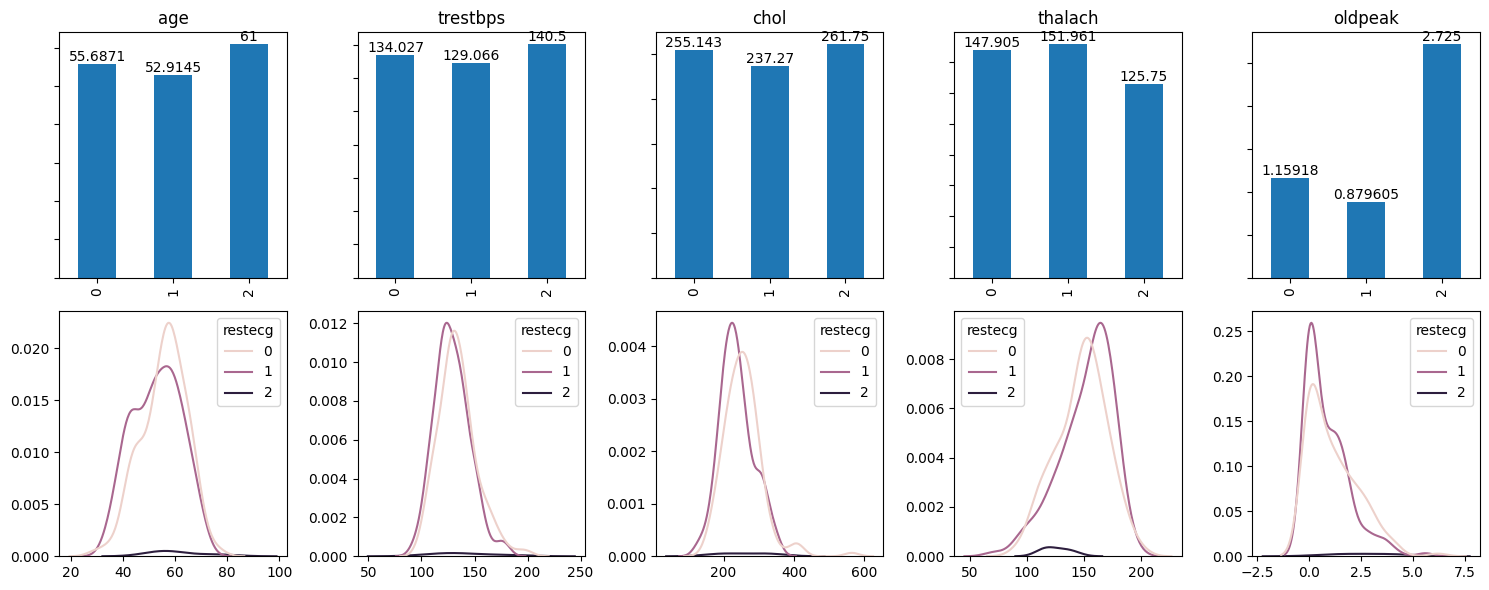

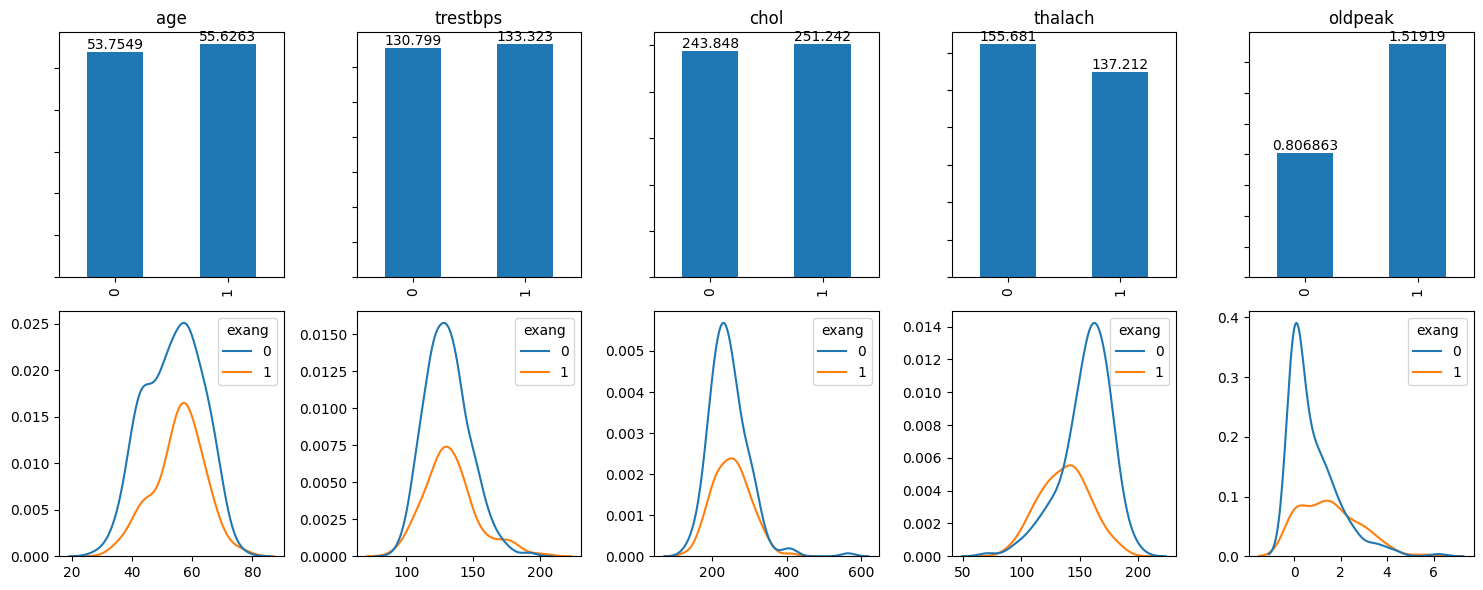

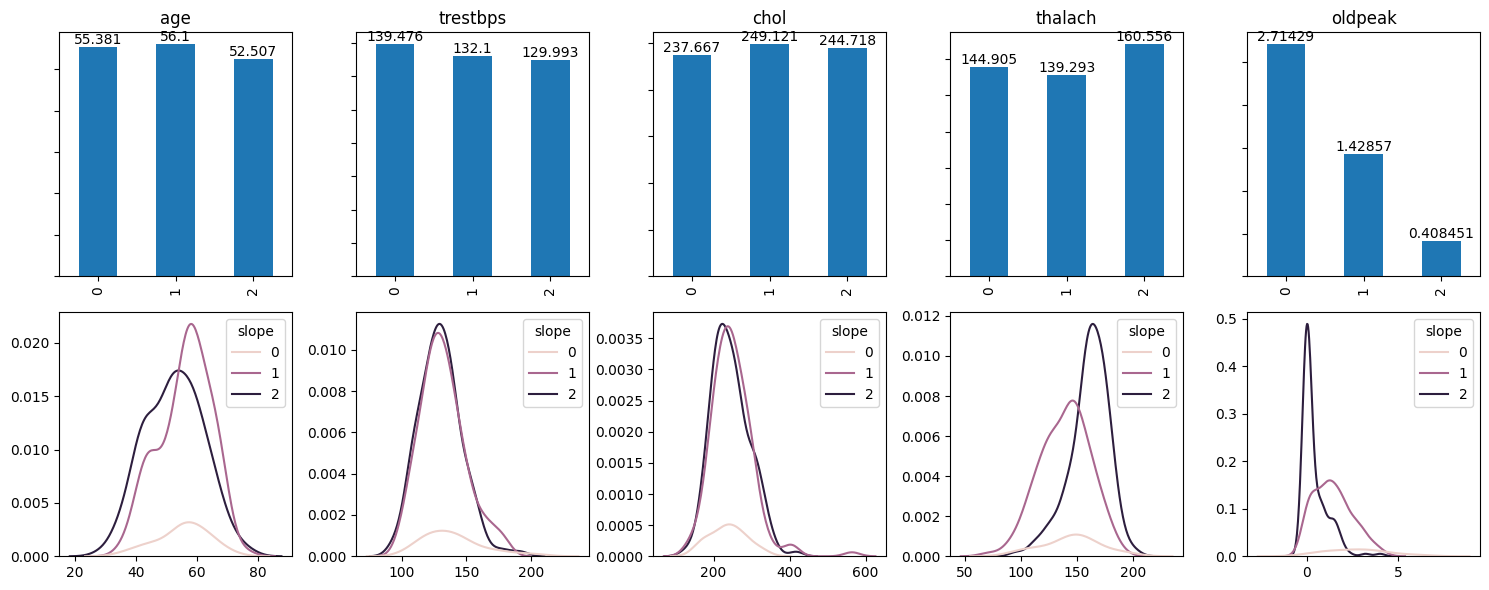

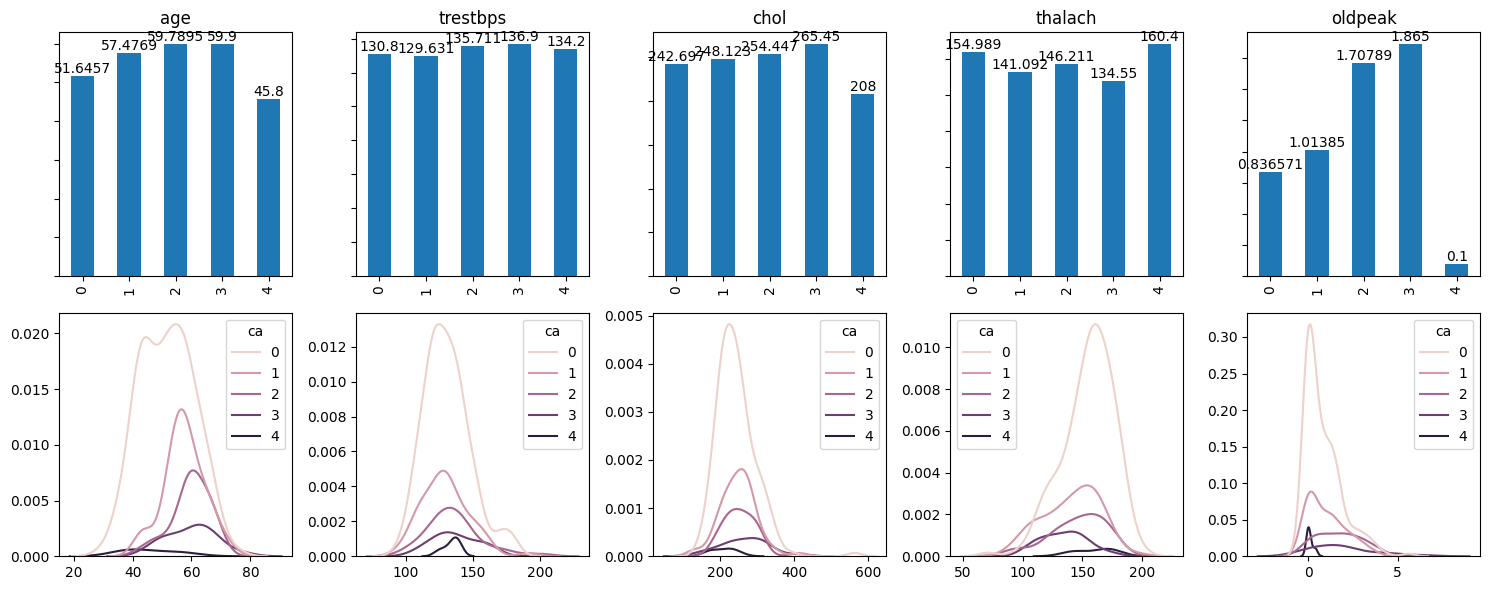

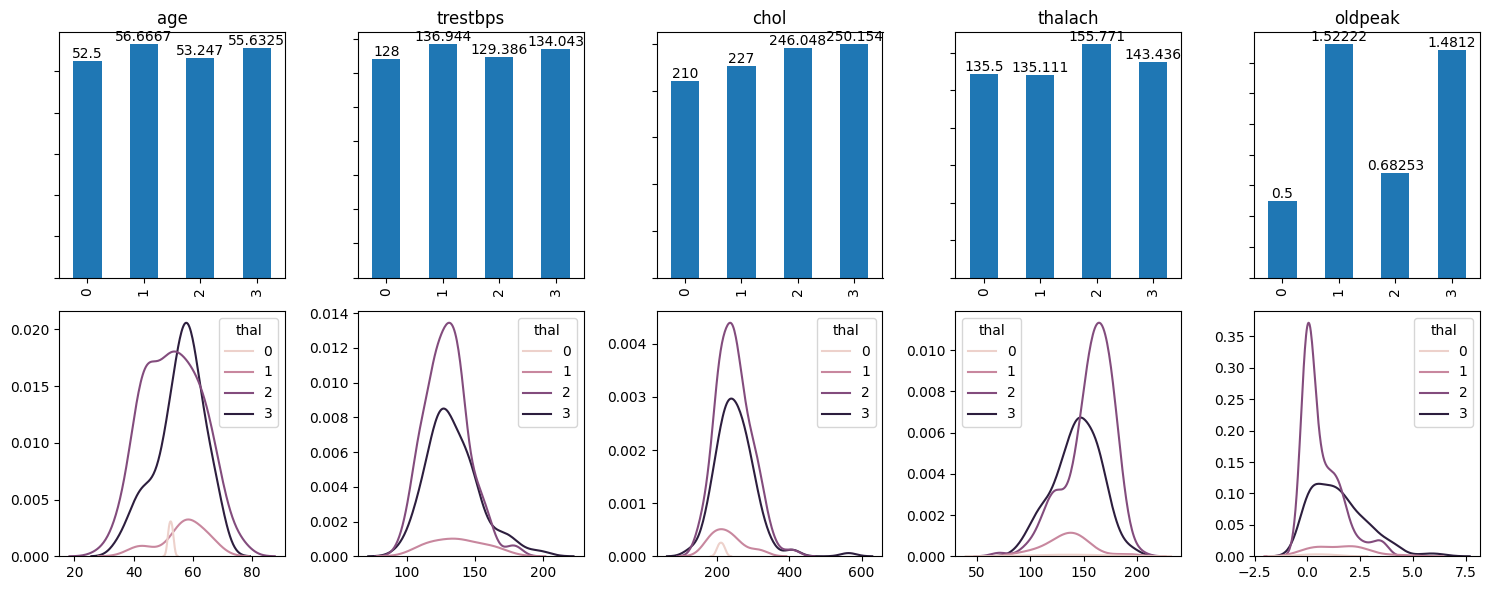

In [12]:
for i in cats[:-1]:
    display(HTML("<h2>Distribution for {}</h2>".format(i)))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    grouped = df.groupby(i)
    for j, k in enumerate(nums):
        index = 0
        mean = grouped[k].mean()
        mean.plot(kind="bar", ax=axes[index][j])
        bar_plots(axes[index][j])
        axes[index][j].set_ylabel("")
        axes[index][j].set_xlabel("")
        axes[index][j].set_title(k)
        
        index += 1
        
        sns.kdeplot(df, x=k, hue=i, ax=axes[index][j])
        axes[index][j].set_ylabel("")
        axes[index][j].set_xlabel("")
        
    plt.tight_layout()
    plt.show()

# Scaling features for training

In [13]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [15]:
def training():
    scores, reports, cms = [], dict(), dict()
    
    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
    
    dd = pd.DataFrame({"score": scores}, index=names)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    fig, axes = plt.subplots()
    dd["score"].plot(kind="bar", ax=axes)
    bar_plots(axes)
    plt.show()
    
    index = 0
    
    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()
        
    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

# Classification models defined

In [16]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lgr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
lgb = LGBMClassifier(verbose=-100)

models = [rfc, etc, abc, gbc,
         lgr, svc, xgb, lgb]

names = ["Random Forest", "Extra Trees", "Ada Boost", "Gradient Boosting",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

# Trained classification models performance evaluation

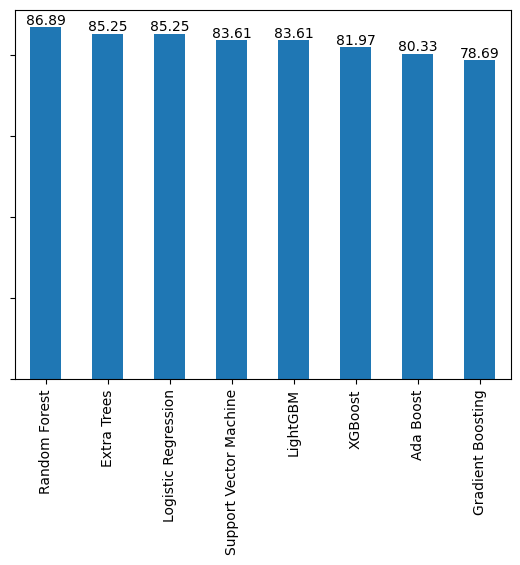

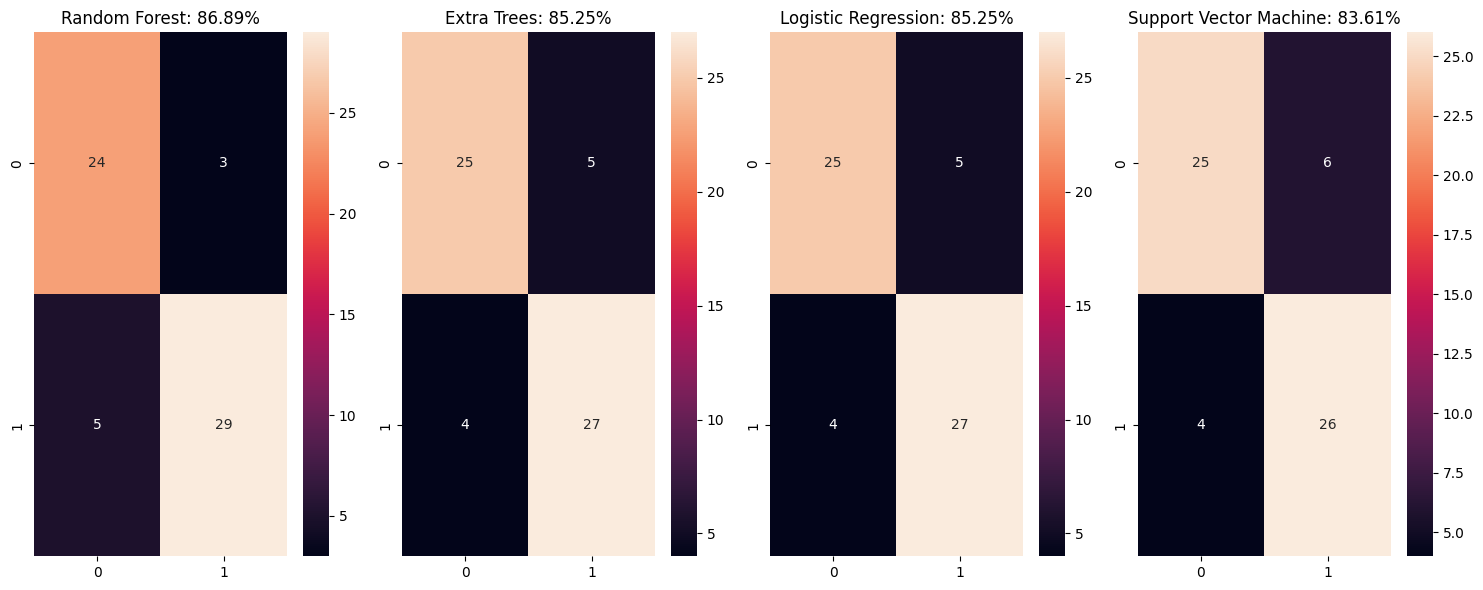

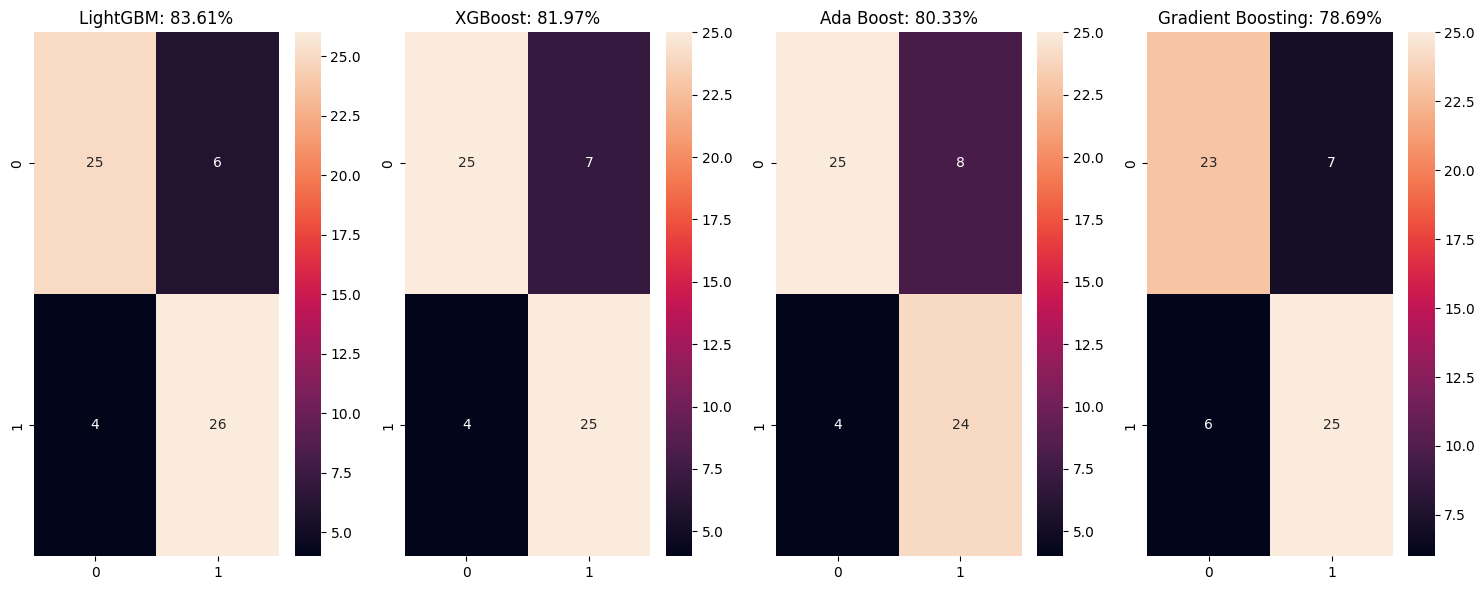

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




******************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                         

In [17]:
training()